# Feed Forward Neural Network

In [1]:
# MNIST
# DataLoader, Transformation
# Multilayer Neural Net, Activation function
# Loss and Optimizer
# Training Loop
# Model Evaluation
# GPU Support

In [2]:
# import required packages
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [21]:
# hyper parameters
input_size = 784 # 28*28
hidden_size = 100
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [7]:
# MNISt
train_dataset = torchvision.datasets.MNIST(root='./datasets', 
                                           train=True, 
                                           transform = transforms.ToTensor(), 
                                           download = True)

test_dataset = torchvision.datasets.MNIST(root='./datasets', 
                                           train=False, 
                                           transform = transforms.ToTensor(), 
                                           download = True)

100.0%


Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw



102.8%


Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



100.0%


Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw



112.7%
/home/keshavchaurasia/workspace/ml/pytorch_venv/lib/python3.6/site-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw

Processing...
Done!


In [8]:
# creating a dataloader
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle=False)

In [10]:
# getting one example
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


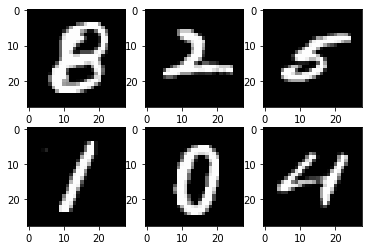

In [11]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

## creating model

In [12]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [13]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [14]:
# loss and optimizer

In [15]:
criterion = nn.CrossEntropyLoss() # this will apply softmax for us
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [22]:
# training_loooooop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1)%100 == 0:
            print(f'epoch {epoch +1 }/{num_epochs}, step {i + 1} / {n_total_steps}, loss {loss.item():.4f}')
        


epoch 1/5, step 100 / 600, loss 0.1360
epoch 1/5, step 200 / 600, loss 0.0416
epoch 1/5, step 300 / 600, loss 0.2322
epoch 1/5, step 400 / 600, loss 0.1977
epoch 1/5, step 500 / 600, loss 0.0606
epoch 1/5, step 600 / 600, loss 0.1366
epoch 2/5, step 100 / 600, loss 0.0670
epoch 2/5, step 200 / 600, loss 0.1461
epoch 2/5, step 300 / 600, loss 0.1799
epoch 2/5, step 400 / 600, loss 0.0661
epoch 2/5, step 500 / 600, loss 0.0992
epoch 2/5, step 600 / 600, loss 0.1074
epoch 3/5, step 100 / 600, loss 0.0411
epoch 3/5, step 200 / 600, loss 0.0421
epoch 3/5, step 300 / 600, loss 0.1198
epoch 3/5, step 400 / 600, loss 0.0411
epoch 3/5, step 500 / 600, loss 0.0552
epoch 3/5, step 600 / 600, loss 0.1473
epoch 4/5, step 100 / 600, loss 0.0278
epoch 4/5, step 200 / 600, loss 0.1064
epoch 4/5, step 300 / 600, loss 0.0430
epoch 4/5, step 400 / 600, loss 0.1010
epoch 4/5, step 500 / 600, loss 0.0570
epoch 4/5, step 600 / 600, loss 0.0387
epoch 5/5, step 100 / 600, loss 0.0529
epoch 5/5, step 200 / 600

In [24]:
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        output = model(images)

        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    
    print(f'accuracy = {acc}%')

accuracy = 10.1%
